### Import Libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import warnings
warnings.filterwarnings("ignore")
import sweetviz as sv

### Import Data

In [2]:
magic=pd.read_csv(r'stats.csv')

### Clean Data and Verify Dataframe

In [3]:
magic[['Name', 'Player_ID']] = magic.Player.str.split('\\', expand=True)
magic[['FirstName', 'LastName']] = magic.Name.str.split(' ', expand=True)
magic = magic.drop(['Player', 'Name'], axis= 1)
magic.rename(columns = {'Unnamed: 6':'H/A', 'Unnamed: 8': 'W/L'}, inplace = True) 
magic.head()

,Rk,Age,Pos,Date,Tm,H/A,Opp,W/L,GmSc,GS,...,AST,STL,BLK,TOV,PF,PTS,BPM,Player_ID,FirstName,LastName
0,1,30-111,C,2021-02-12,ORL,@,SAC,W,39.5,1,...,4,2,0,1,1,42,24.7,vucevni01,Nikola,Vučević
1,2,30-104,C,2021-02-05,ORL,NaN,CHI,W,37.7,1,...,4,0,1,1,2,43,14.2,vucevni01,Nikola,Vučević
2,3,30-084,C,2021-01-16,ORL,@,BRK,L,33.1,1,...,7,5,0,4,4,34,18.5,vucevni01,Nikola,Vučević
3,4,30-118,C,2021-02-19,ORL,NaN,GSW,W,32.2,1,...,10,1,1,0,1,30,12.5,vucevni01,Nikola,Vučević
4,5,30-120,C,2021-02-21,ORL,NaN,DET,W,30.0,1,...,3,1,2,1,2,37,11.7,vucevni01,Nikola,Vučević


### Histogram of Player GameScore Distribution

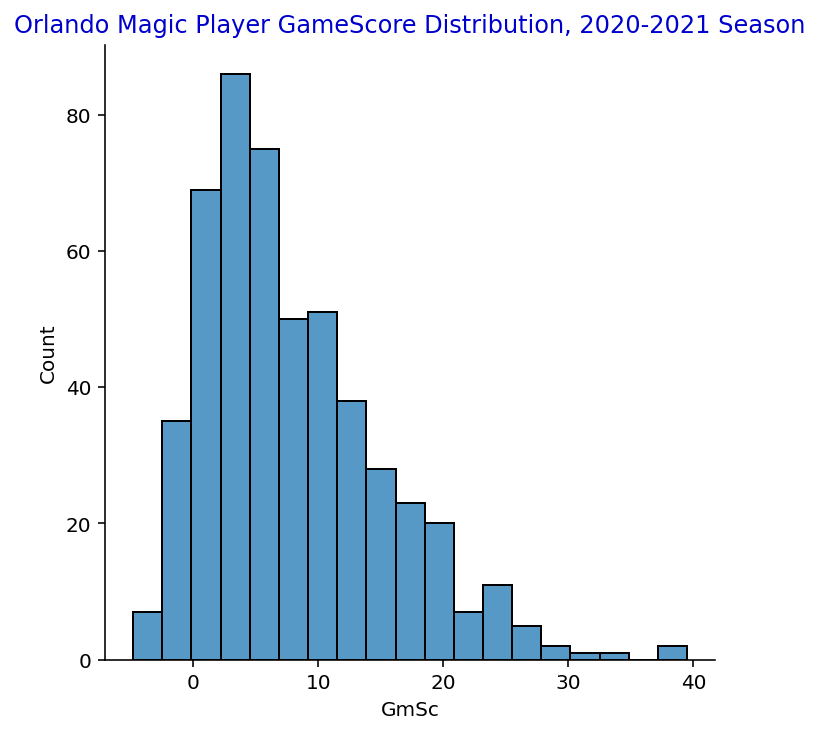

In [4]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()


### Swarmplot of GameScore Distribution, by Player

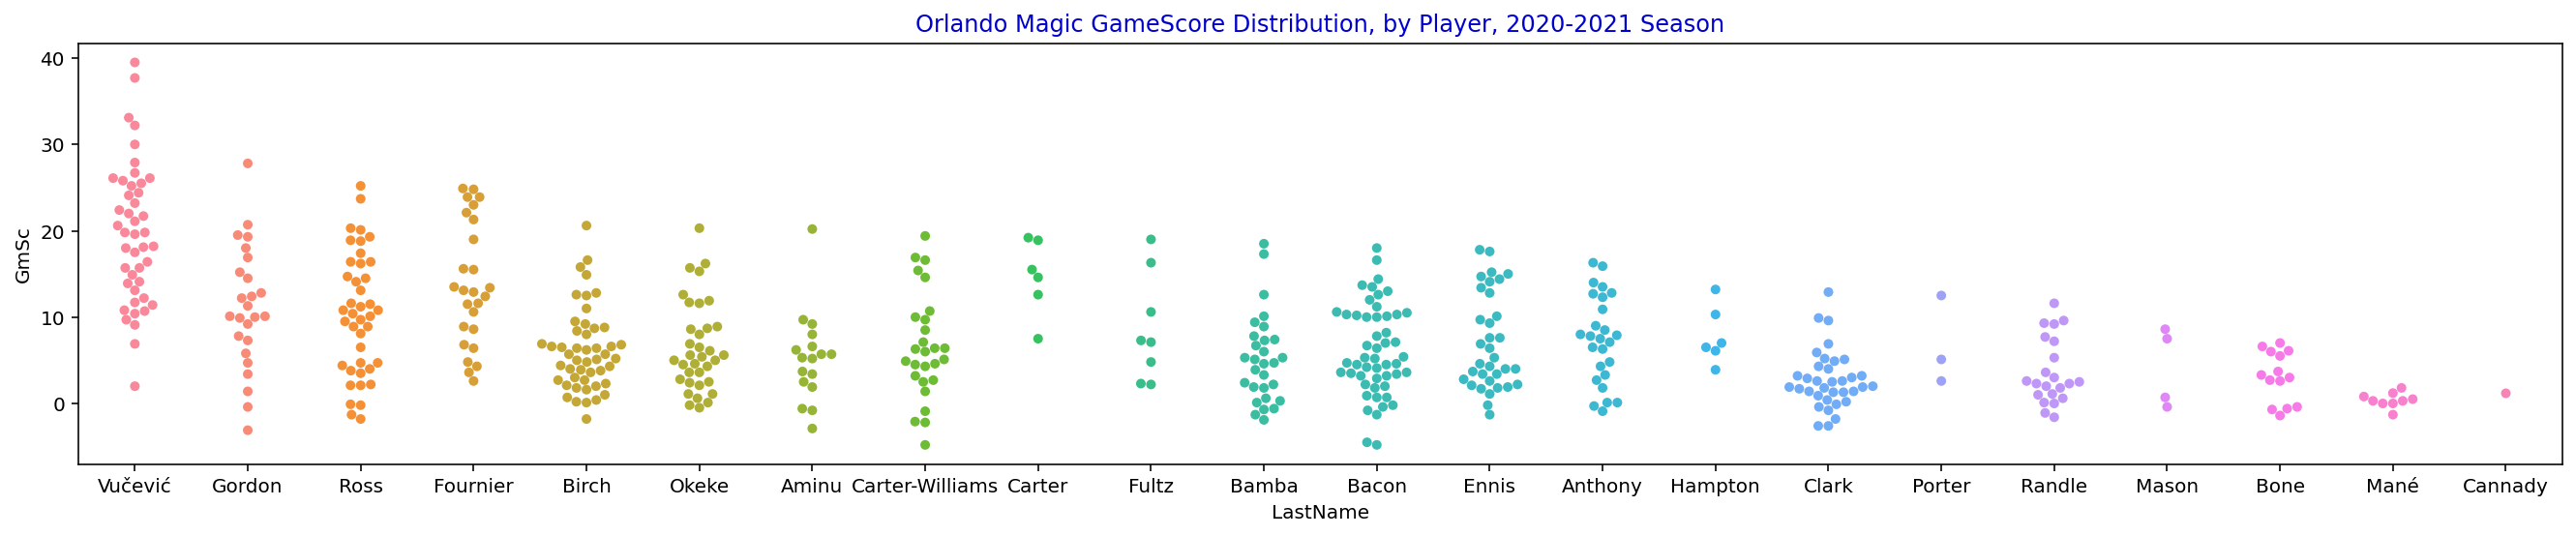

In [5]:
fig, ax = plt.subplots(figsize=(23,4))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()


### Boxplot of GameScore Distribution, by Player

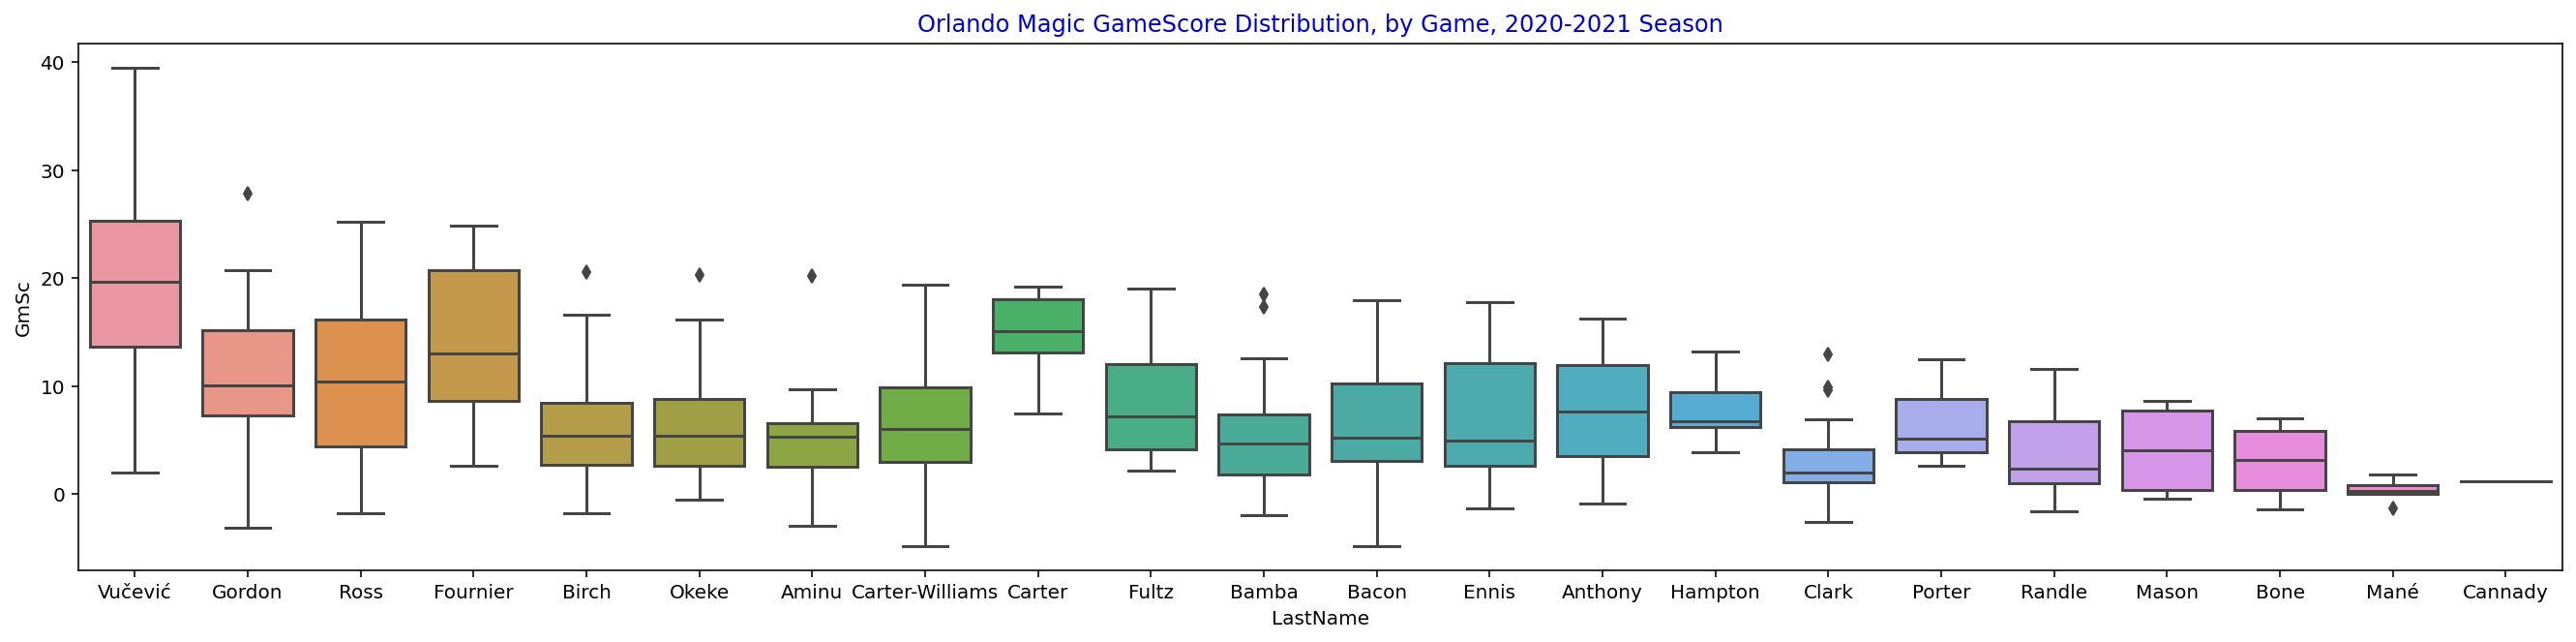

In [6]:
fig, ax = plt.subplots(figsize=(23,5))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

### Scatterplot of GameScore versus Minutes Played, by Player

GameScore versus Minutes Played, by Player


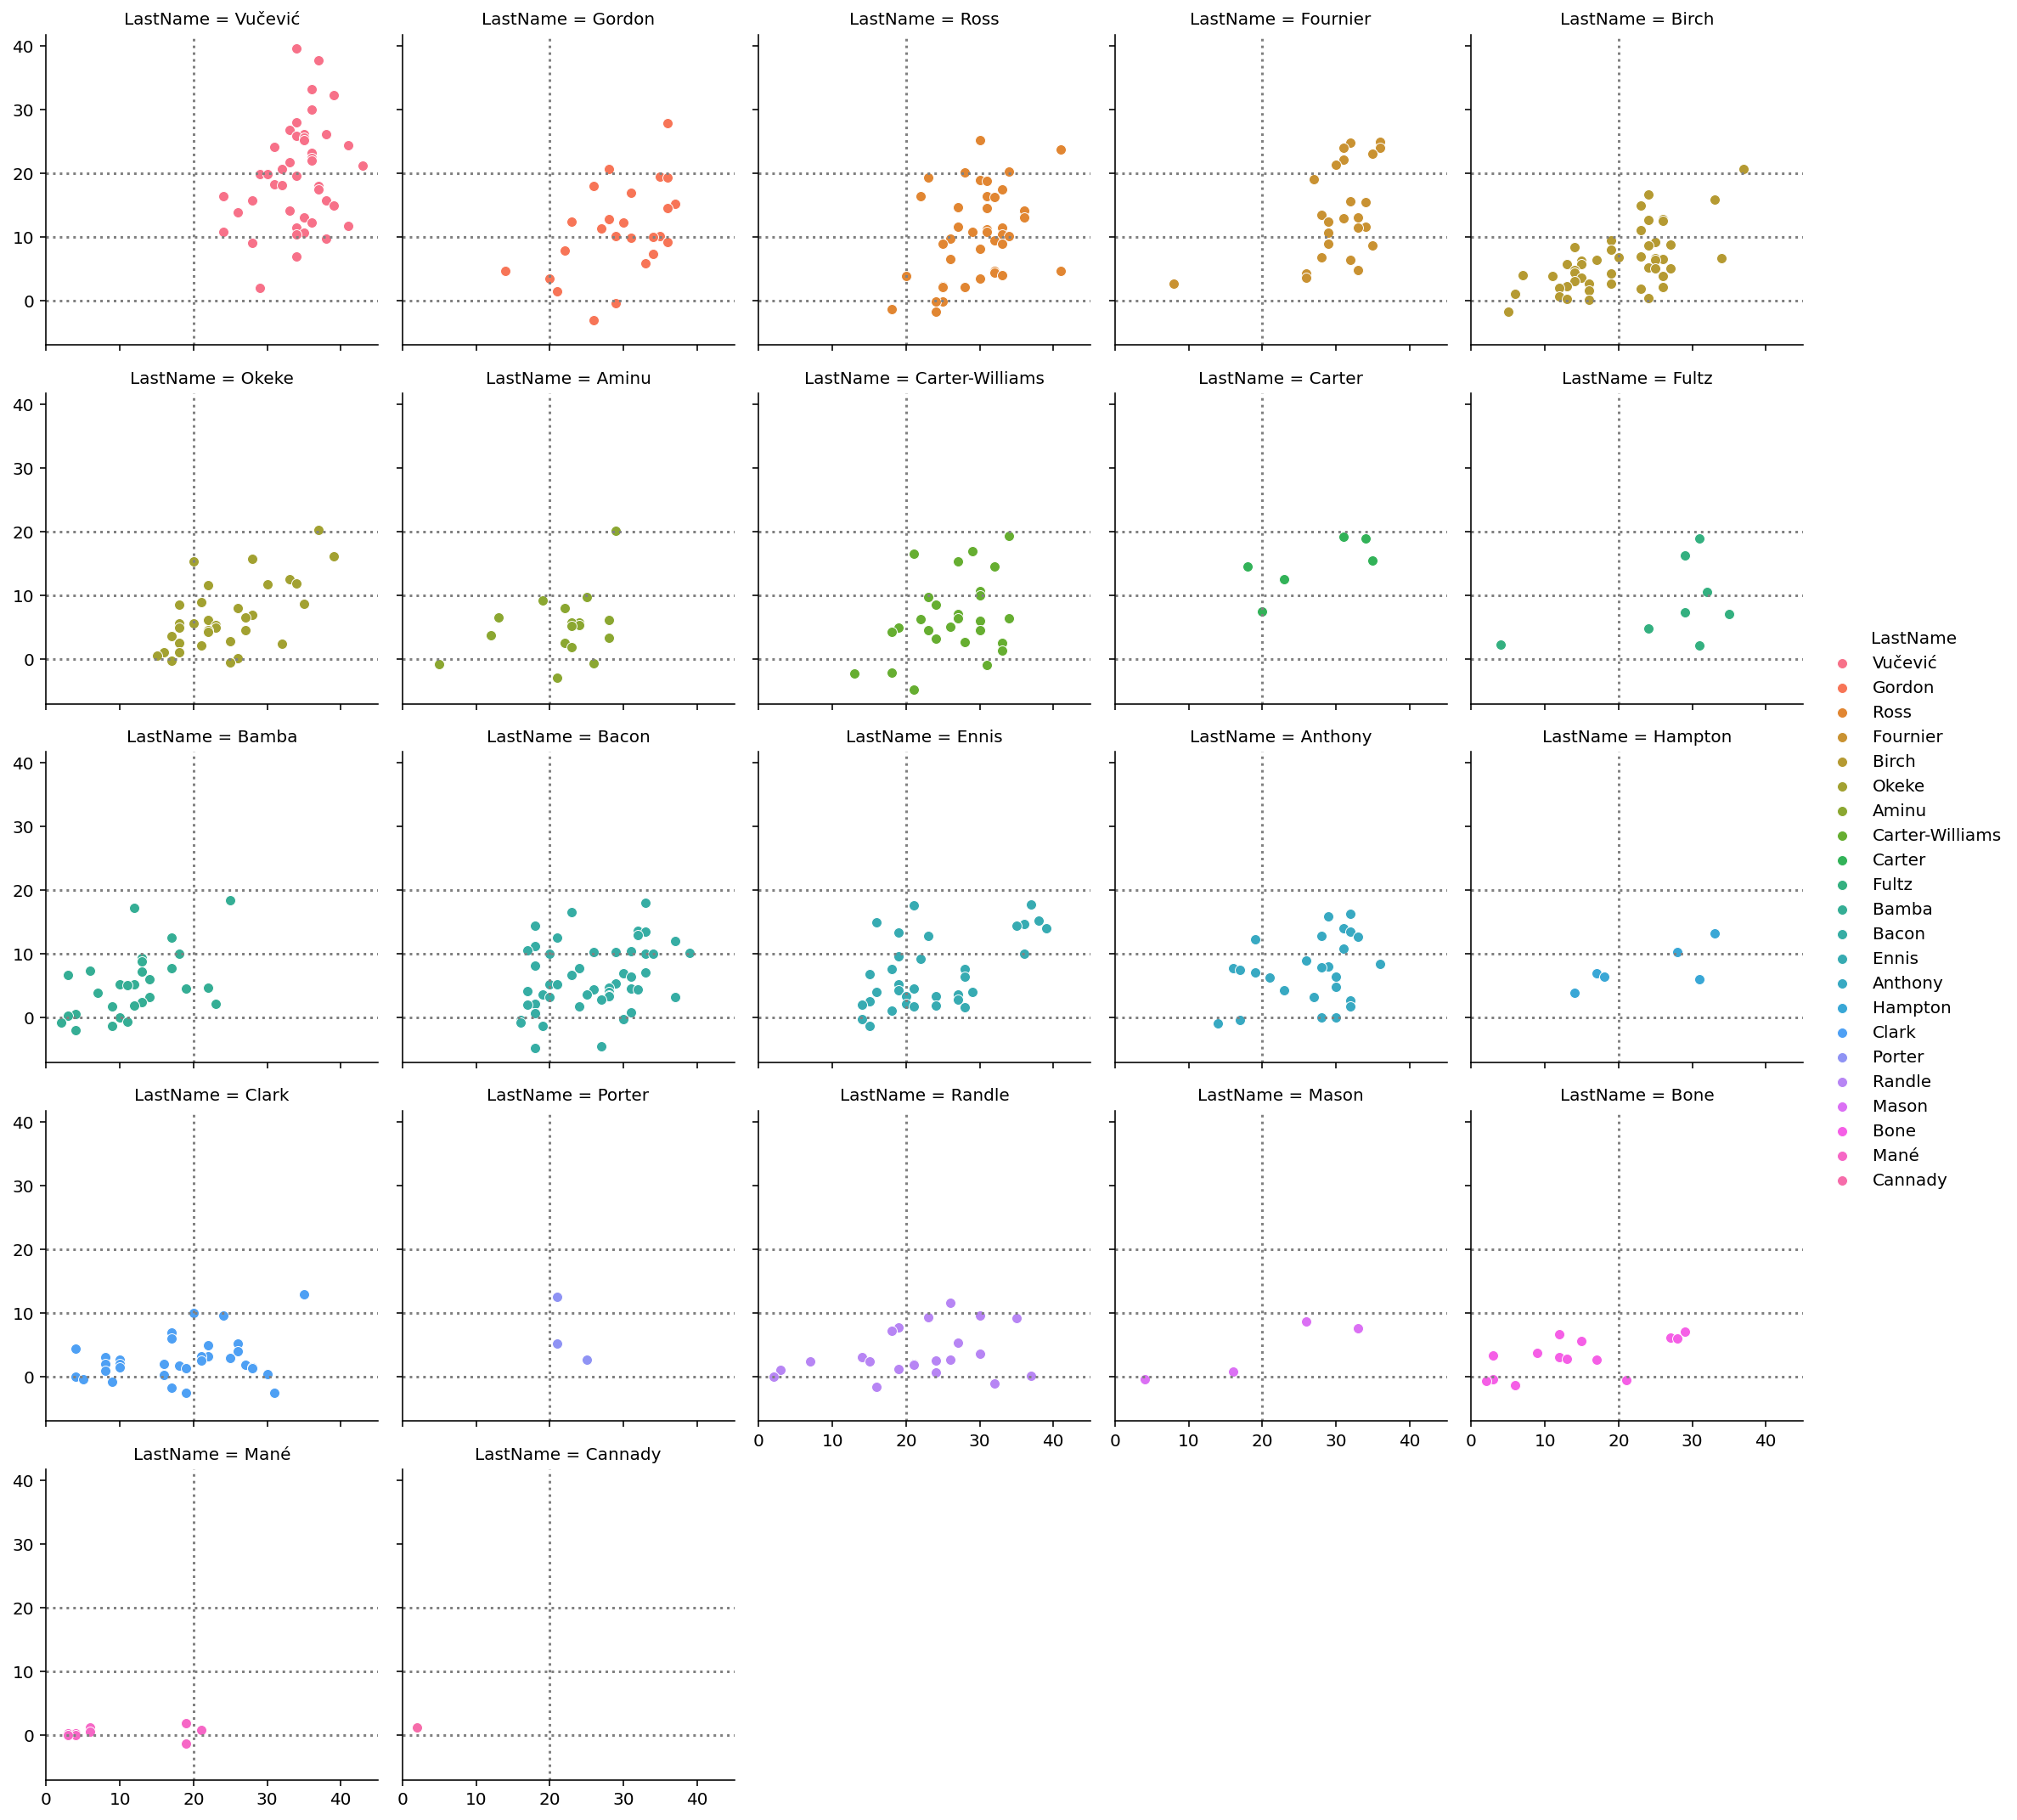

In [7]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.map(plt.axhline, y=10, ls=":", c=".5")
grid.map(plt.axhline, y=20, ls=":", c=".5")
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.axvline, x=20, ls=":", c=".5")
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

### FacetGrid of GameScore versus Date Game Played, Ranked by Highest GameScore

GameScore versus Date Game Played, by GmSc Rank


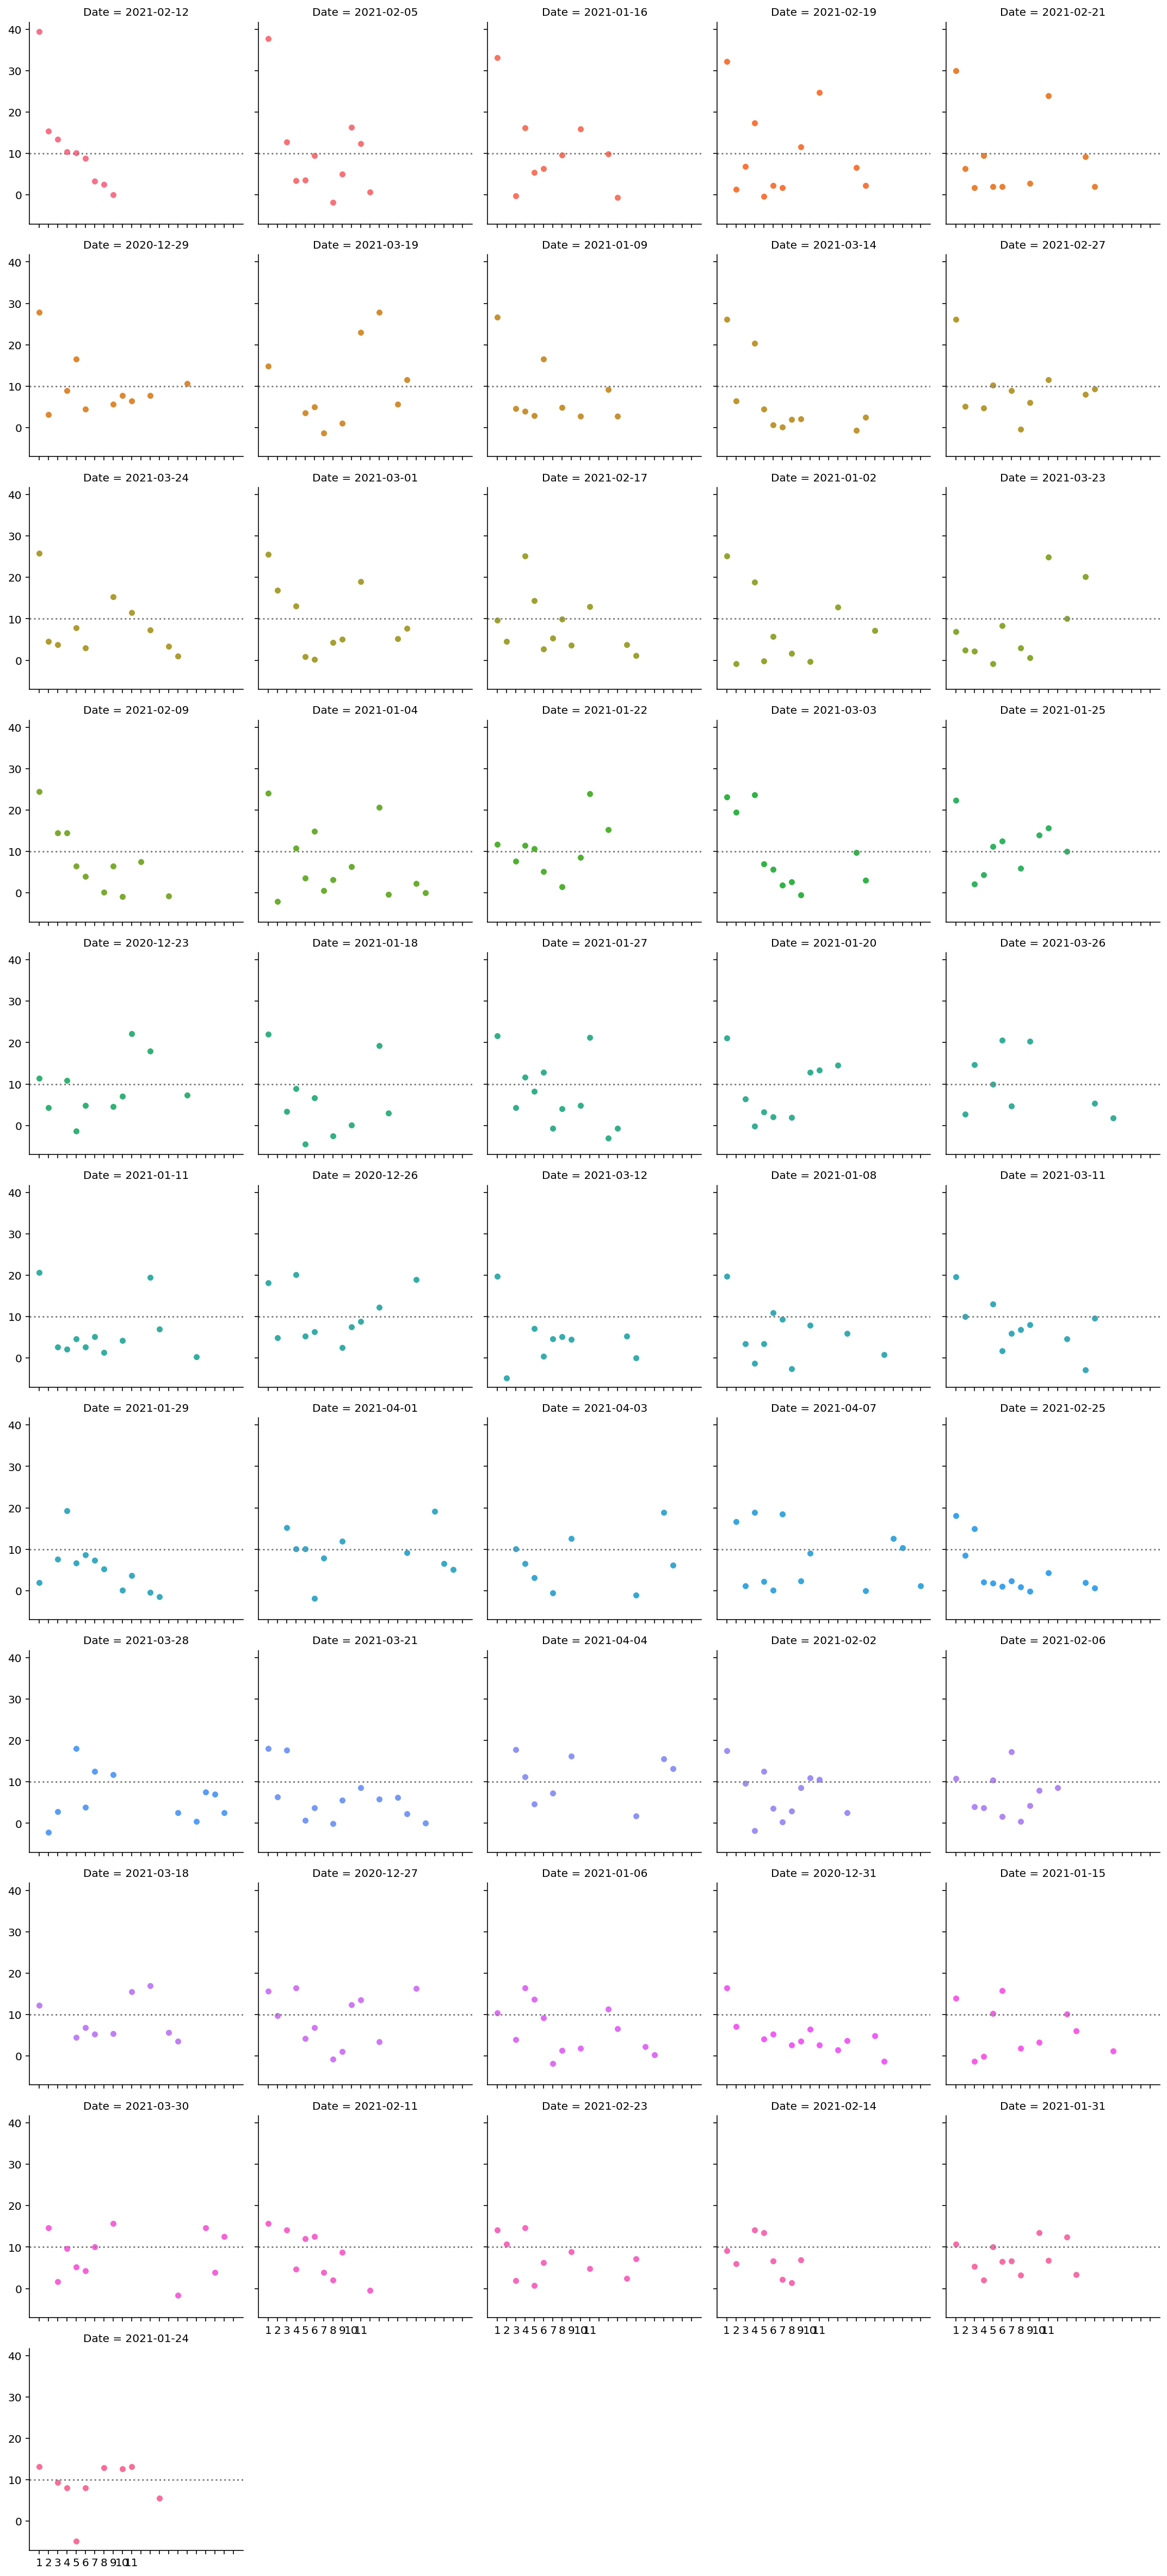

In [8]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

### Descriptive Statistics for GameScore, by Player

In [9]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                       
                count       mean       std  min     25%    50%     75%   max
LastName                                                                    
Aminu            17.0   5.235294  5.192897 -2.9   2.500   5.30   6.600  20.2
Anthony          26.0   7.419231  5.113826 -0.9   3.550   7.65  11.950  16.3
Bacon            51.0   6.125490  5.206605 -4.8   3.050   5.20  10.250  18.0
Bamba            29.0   5.137931  5.104999 -1.9   1.800   4.70   7.400  18.5
Birch            48.0   6.168750  4.752520 -1.8   2.700   5.45   8.475  20.6
Bone             14.0   3.100000  2.936246 -1.4   0.350   3.15   5.875   7.0
Cannady           1.0   1.200000       NaN  1.2   1.200   1.20   1.200   1.2
Carter            6.0  14.716667  4.354040  7.5  13.100  15.05  18.050  19.2
Carter-Williams  27.0   6.562963  6.147241 -4.8   2.950   6.00   9.850  19.4
Clark            35.0   2.760000  3.364276 -2.6   1.100   2.00   4.150  12.9
Ennis            34.0   7.058824  5.543061 -1.3   2.650   4.95  12.125  17.8
Fournier         26.0  13.807692  7.129091  2.6   8.675  13.00  20.725  24.9
Fultz             8.0   8.700000  6.215189  2.2   4.175   7.20  12.025  19.0
Gordon           25.0  11.072000  7.112754 -3.1   7.300  10.10  15.200  27.8
Hampton           6.0   7.833333  3.341656  3.9   6.200   6.75   9.475  13.2
Mané              9.0   0.400000  0.866025 -1.3   0.000   0.30   0.800   1.8
Mason             4.0   4.100000  4.605070 -0.4   0.425   4.10   7.775   8.6
Okeke            35.0   6.520000  5.184922 -0.5   2.650   5.40   8.800  20.3
Porter            3.0   6.733333  5.148139  2.6   3.850   5.10   8.800  12.5
Randle           22.0   3.640909  3.808344 -1.6   1.025   2.40   6.725  11.6
Ross             41.0  10.370732  7.066479 -1.8   4.400  10.40  16.200  25.2
Vučević          44.0  19.659091  8.130572  2.0  13.700  19.70  25.275  39.5

### Player Ranked by GameScore

In [10]:
print ("\033[1m"+(colored("Total Season GameScore, by Player", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName','MP']].groupby(['LastName']).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Total Season GameScore, by Player
                  GmSc    MP
LastName                    
Vučević          865.0  1500
Ross             425.2  1212
Fournier         359.0   786
Bacon            312.4  1303
Birch            296.1   954
Gordon           276.8   737
Ennis            240.0   801
Okeke            228.2   840
Anthony          192.9   690
Carter-Williams  177.2   707
Bamba            149.0   346
Clark             96.6   637
Aminu             89.0   367
Carter            88.3   161
Randle            80.1   469
Fultz             69.6   215
Hampton           47.0   141
Bone              43.4   197
Porter            20.2    67
Mason             16.4    79
Mané               3.6    85
Cannady            1.2     2


### Player Ranked by Minutes Played

In [11]:
print ("\033[1m"+(colored("Total Minutes Played, by Player", 'blue'))+"\033[0m")
game_score = magic[['MP','LastName','GmSc']].groupby(['LastName']).sum()
sort_game_score = game_score.sort_values(by=['MP'], ascending=False)
print(sort_game_score)

Total Minutes Played, by Player
                   MP   GmSc
LastName                    
Vučević          1500  865.0
Bacon            1303  312.4
Ross             1212  425.2
Birch             954  296.1
Okeke             840  228.2
Ennis             801  240.0
Fournier          786  359.0
Gordon            737  276.8
Carter-Williams   707  177.2
Anthony           690  192.9
Clark             637   96.6
Randle            469   80.1
Aminu             367   89.0
Bamba             346  149.0
Fultz             215   69.6
Bone              197   43.4
Carter            161   88.3
Hampton           141   47.0
Mané               85    3.6
Mason              79   16.4
Porter             67   20.2
Cannady             2    1.2


### Game Ranked by Aggregate GameScore

In [12]:
print ("\033[1m"+(colored("Aggregate Team GameScore, by Game", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName','Date']].groupby(['Date']).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Aggregate Team GameScore, by Game
             GmSc
Date             
2021-02-19  106.9
2020-12-26  105.0
2021-02-12  103.6
2021-02-05   99.7
2020-12-29   99.2
2020-12-27   98.6
2021-01-25   98.1
2021-03-01   97.8
2021-01-16   95.7
2021-03-03   95.7
2021-01-22   95.5
2021-04-01   93.3
2021-02-17   93.0
2021-04-07   92.9
2021-03-19   91.3
2021-03-30   90.7
2021-02-27   89.7
2021-02-21   89.6
2020-12-23   89.1
2021-04-04   87.6
2021-01-27   84.2
2021-01-04   83.9
2021-03-24   83.4
2021-01-31   80.5
2021-03-26   80.1
2021-03-23   78.0
2021-01-24   77.9
2021-02-02   77.5
2021-03-11   76.7
2021-02-09   76.2
2021-03-18   76.0
2021-01-06   75.4
2021-01-20   75.2
2021-03-21   74.8
2021-01-09   74.3
2021-02-11   73.3
2021-02-23   71.7
2021-01-11   70.3
2021-01-02   69.9
2021-02-06   69.3
2021-03-28   67.0
2021-03-14   64.0
2021-01-15   61.1
2021-02-14   59.8
2021-01-29   58.8
2021-01-08   57.8
2020-12-31   56.7
2021-02-25   56.4
2021-01-18   56.2
2021-04-03   55.7
2021-03-12   42.1


### Descriptive Statistics

In [13]:
magic.describe()

,Rk,GmSc,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,493.000000,511.000000,511.000000,467.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.000000,511.000000,511.000000
mean,256.000000,7.978865,0.499022,24.062622,3.864971,8.970646,0.411643,2.710372,5.686888,0.471961,...,1.048924,3.538160,4.587084,2.242661,0.700587,0.414873,1.23092,1.686888,10.434442,-2.337182
std,147.657261,7.227018,0.500489,8.918805,3.244810,6.189580,0.209196,2.495146,4.513575,0.271782,...,1.335618,2.861169,3.471982,2.113407,0.917360,0.716811,1.34219,1.356106,8.335790,9.483359
min,1.000000,-4.800000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-37.700000
25%,128.500000,2.600000,0.000000,18.000000,1.000000,4.000000,0.286000,1.000000,2.000000,0.324500,...,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.00000,1.000000,4.000000,-7.700000
50%,256.000000,6.400000,0.000000,25.000000,3.000000,8.000000,0.400000,2.000000,4.000000,0.500000,...,1.000000,3.000000,4.000000,2.000000,0.000000,0.000000,1.00000,1.000000,8.000000,-2.900000
75%,383.500000,12.250000,1.000000,31.000000,6.000000,13.000000,0.529000,4.000000,8.000000,0.636000,...,2.000000,5.000000,6.000000,3.000000,1.000000,1.000000,2.00000,3.000000,15.000000,2.800000
max,511.000000,39.500000,1.000000,43.000000,17.000000,29.000000,1.000000,13.000000,21.000000,1.000000,...,10.000000,16.000000,19.000000,10.000000,5.000000,4.000000,7.00000,6.000000,43.000000,60.300000


### Create Standalone Sweetviz Report

In [14]:
my_report = sv.analyze(magic)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
